In [1]:
import pyarrow.parquet as pq
import random
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
RANDOM_SEED = 123

raw = pq.read_table('./Data/not_onehot_cleaned_taxi_data.parquet')
#raw = pq.read_table('./Data/cleaned_taxi_data.parquet')
raw = raw.to_pandas()


feature_cols = list(range(0, 11)) + list(range(12, 17))+ list(range(19, 31))

X = raw.iloc[:, feature_cols]
y = raw.iloc[:, 18]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED)


In [3]:
raw.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tip_pct,tip_bin,PU_day_in_june_2021,PU_time_hour,PU_time_min,DO_day_in_june_2021,DO_time_hour,DO_time_min,avg_temp,avg_dew_pt,avg_humidity,avg_wind_speed,avg_pressure,total_precipitation
count,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06
mean,1.713920e+00,1.472616e+00,2.017087e+00,1.003058e+00,7.788844e-03,1.682210e+02,1.668505e+02,1.224111e+00,9.898870e+00,1.023657e+00,4.994395e-01,1.966696e+00,4.196900e-03,2.999851e-01,1.543090e+01,2.434673e+00,1.301362e-04,1.204877e-01,7.376639e-01,1.561845e+01,1.427691e+01,2.964435e+01,1.562462e+01,1.436345e+01,2.960596e+01,7.492776e+01,5.842747e+01,5.911936e+01,9.277435e+00,2.997130e+01,6.417241e-02
std,4.519271e-01,1.039033e+00,1.671309e+00,9.978257e-02,8.791008e-02,6.633780e+01,6.843555e+01,4.314849e-01,5.098086e+00,1.194539e+00,1.673157e-02,1.719994e+00,1.745916e-01,2.113585e-03,6.083246e+00,3.988098e-01,1.275356e-02,7.865103e-02,5.880661e-01,8.649097e+00,5.276815e+00,1.733007e+01,8.649838e+00,5.337169e+00,1.743247e+01,7.183517e+00,8.385969e+00,1.255664e+01,1.977477e+00,1.711145e-01,1.562487e-01
min,1.000000e+00,1.000000e+00,1.000000e-02,1.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.480000e+01,3.780000e+01,3.030000e+01,5.100000e+00,2.970000e+01,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.020000e+00,1.000000e+00,0.000000e+00,1.250000e+02,1.140000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,8.000000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00,4.795991e-02,0.000000e+00,8.000000e+00,1.100000e+01,1.500000e+01,8.000000e+00,1.100000e+01,1.400000e+01,6.860000e+01,5.250000e+01,5.130000e+01,8.000000e+00,2.990000e+01,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.610000e+00,1.000000e+00,0.000000e+00,1.630000e+02,1.630000e+02,1.000000e+00,8.500000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.416000e+01,2.500000e+00,0.000000e+00,1.661017e-01,1.000000e+00,1.600000e+01,1.500000e+01,3.000000e+01,1.600000e+01,1.500000e+01,3.000000e+01,7.290000e+01,5.980000e+01,5.760000e+01,9.500000e+00,2.990000e+01,0.000000e+00
75%,2.000000e+00,2.000000e+00,2.520000e+00,1.000000e+00,0.000000e+00,2.360000e+02,2.360000e+02,1.000000e+00,1.200000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.790000e+01,2.500000e+00,0.000000e+00,1.666667e-01,1.000000e+00,2.300000e+01,1.800000e+01,4.500000e+01,2.300000e+01,1.800000e+01,4.500000e+01,8.120000e+01,6.710000e+01,6.910000e+01,1.070000e+01,3.010000e+01,0.000000e+00
max,2.000000e+00,7.000000e+00,9.990000e+01,6.000000e+00,1.000000e+00,2.630000e+02,2.630000e+02,4.000000e+00,3.000000e+02,4.550000e+01,5.000000e-01,3.500000e+02,2.620000e+01,3.000000e-01,3.573000e+02,2.750000e+00,1.250000e+00,9.940000e-01,3.000000e+00,3.000000e+01,2.300000e+01,5.900000e+01,3.100000e+01,2.300000e+01,5.900000e+01,8.970000e+01,6.870000e+01,8.390000e+01,1.290000e+01,3.030000e+01,6.700000e-01


In [4]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state = RANDOM_SEED)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities



In [5]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9975242305610806


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

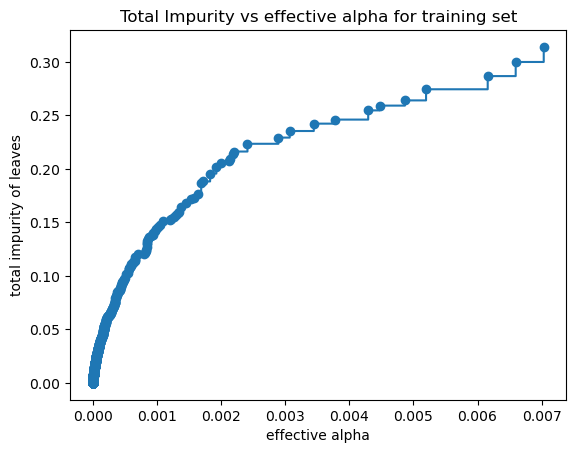

In [6]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [7]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

KeyboardInterrupt: 

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
print(train_scores)
print(test_scores)

In [ ]:
tree.plot_tree(clf)